# Overfit Multilayer Perceptron

In [1]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot

In [37]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [38]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [39]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

In [41]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


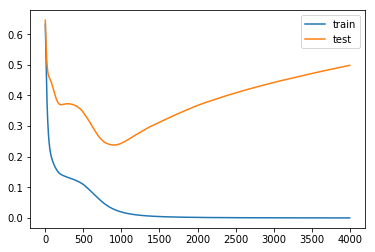

In [42]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Overfit MLP With Early Stopping

In [43]:
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from tensorflow.keras.models import load_model

In [44]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [45]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [46]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [48]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])


Epoch 00001: val_acc improved from -inf to 0.52857, saving model to best_model.h5

Epoch 00002: val_acc improved from 0.52857 to 0.68571, saving model to best_model.h5

Epoch 00003: val_acc did not improve from 0.68571

Epoch 00004: val_acc did not improve from 0.68571

Epoch 00005: val_acc improved from 0.68571 to 0.71429, saving model to best_model.h5

Epoch 00006: val_acc did not improve from 0.71429

Epoch 00007: val_acc did not improve from 0.71429

Epoch 00008: val_acc did not improve from 0.71429

Epoch 00009: val_acc did not improve from 0.71429

Epoch 00010: val_acc did not improve from 0.71429

Epoch 00011: val_acc did not improve from 0.71429

Epoch 00012: val_acc did not improve from 0.71429

Epoch 00013: val_acc did not improve from 0.71429

Epoch 00014: val_acc did not improve from 0.71429

Epoch 00015: val_acc did not improve from 0.71429

Epoch 00016: val_acc did not improve from 0.71429

Epoch 00017: val_acc did not improve from 0.71429

Epoch 00018: val_acc did not i

In [49]:
# load the saved model
saved_model = load_model('best_model.h5')

In [50]:
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.943


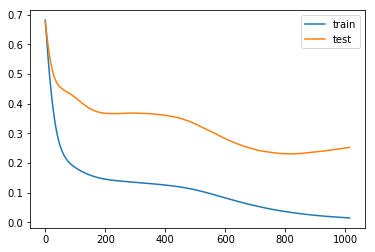

In [51]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()